In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [3]:
df=pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df.experience=df.experience.fillna("zero")
df.experience

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [5]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [7]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [8]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [9]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])


LinearRegression()

In [16]:
reg.predict([[2,10,6]])


C:\Users\victus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55935.17587083])

In [11]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [12]:
reg.intercept_

14992.65144669314

In [13]:
predicted_salaries = reg.predict(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']])

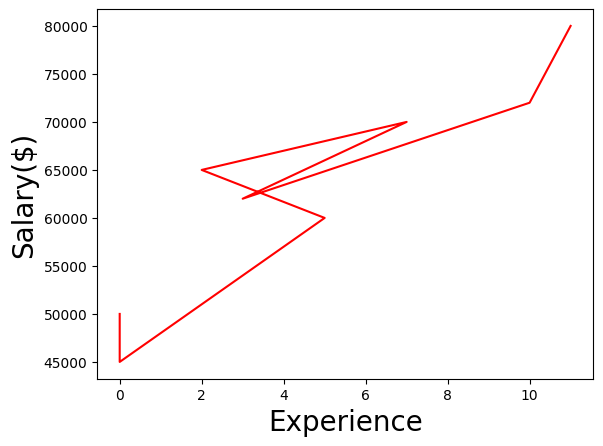

In [17]:
plt.xlabel('Experience', fontsize = 20)
plt.ylabel('Salary($)', fontsize = 20)
plt.plot(df['experience'], df['salary($)'], color = 'red')
